In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pie_pumpkins = pd.read_csv('US-pumpkins.csv')

In [25]:
pie_pumpkins['Date'] = pd.to_datetime(pie_pumpkins['Date'], format='%m/%d/%y')
pie_pumpkins['DayOfYear'] = pie_pumpkins['Date'].dt.dayofyear


In [27]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Low Price']

mask = ~pd.isnull(y)
X = X[mask]
y = y[mask]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

Model determination (R^2 score):  0.023570713611271388


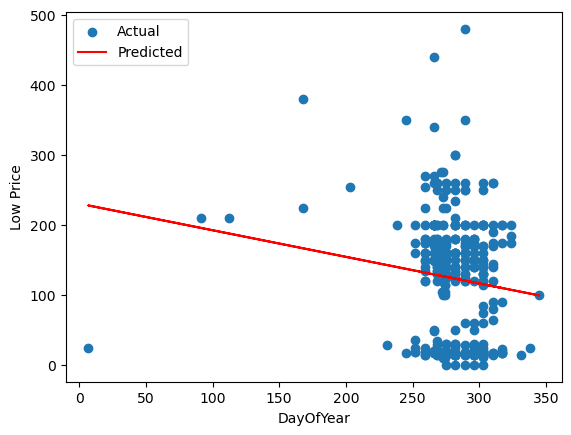

In [32]:
pred = lin_reg.predict(X_test)
score = lin_reg.score(X_train, y_train)
print('Model determination (R^2 score): ', score)

plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, pred, color='red', label='Predicted')
plt.xlabel('DayOfYear')
plt.ylabel('Low Price')
plt.legend()
plt.show()
